In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'ADM'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-06-30,21494,-20322,1172,532,1630,4089,9024,24658,0,...,2904,233,20,11891,5369,19746,1341,-210,653.0,2014-07-25
1,2014-09-30,18117,-16647,1470,748,4539,2121,8034,26639,0,...,3134,177,18,13751,5346,21595,3441,-207,653.0,2014-10-25
2,2014-12-31,20894,-19443,1451,705,1099,2704,9374,26028,0,...,4326,108,24,15602,5528,24422,538,-289,653.0,2015-02-14
3,2015-03-31,17506,-16404,1102,493,890,2036,8372,23896,0,...,3142,848,18,14235,5575,22991,45,-244,621.0,2015-04-25
4,2015-06-30,17186,-16222,964,383,867,2224,7845,22588,0,...,3017,157,801,12859,5965,22024,362,-296,621.0,2015-07-25


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
35,2023-03-31,2023-04-25,533.00,24072,-21992,2080,1172,899,4471,14771,...,6583,58802,6271,1809,952,21408,7745,33942,-1610,-327
36,2023-06-30,2023-07-25,533.00,25190,-23307,1883,928,1426,4110,11902,...,6542,55499,5079,125,301,17473,8244,30560,2509,-287
37,2023-09-30,2023-10-25,533.00,21695,-19885,1810,824,1498,4443,11224,...,6392,55093,5252,116,1,16630,8224,29865,992,-441
38,2023-12-31,2024-03-08,509.85,22978,-21298,1680,823,1368,4232,11957,...,6341,54631,6313,105,1,18662,8259,30166,2569,-439
39,2024-03-31,2024-04-29,494.44,21847,-20188,1659,719,830,4178,11634,...,7051,54831,5599,1734,1,19730,8245,31292,700,-328


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2023-03-31,2023-04-25,533.00,24072,-21992,2080,1172,899,4471,14771,...,58802,6271,1809,952,21408,7745,33942,-1610,-327,1
36,2023-06-30,2023-07-25,533.00,25190,-23307,1883,928,1426,4110,11902,...,55499,5079,125,301,17473,8244,30560,2509,-287,1
37,2023-09-30,2023-10-25,533.00,21695,-19885,1810,824,1498,4443,11224,...,55093,5252,116,1,16630,8224,29865,992,-441,1
38,2023-12-31,2024-03-08,509.85,22978,-21298,1680,823,1368,4232,11957,...,54631,6313,105,1,18662,8259,30166,2569,-439,1
39,2024-03-31,2024-04-29,494.44,21847,-20188,1659,719,830,4178,11634,...,54831,5599,1734,1,19730,8245,31292,700,-328,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2023-03-31,2023-04-25,533.00,24072.0,-21992.0,2080.0,1172.0,899.0,4471.0,14771.0,...,58802.0,6271.0,1809.0,952.0,21408.0,7745.0,33942.0,-1610.0,-327.0,1
36,2023-06-30,2023-07-25,533.00,25190.0,-23307.0,1883.0,928.0,1426.0,4110.0,11902.0,...,55499.0,5079.0,125.0,301.0,17473.0,8244.0,30560.0,2509.0,-287.0,1
37,2023-09-30,2023-10-25,533.00,21695.0,-19885.0,1810.0,824.0,1498.0,4443.0,11224.0,...,55093.0,5252.0,116.0,1.0,16630.0,8224.0,29865.0,992.0,-441.0,1
38,2023-12-31,2024-03-08,509.85,22978.0,-21298.0,1680.0,823.0,1368.0,4232.0,11957.0,...,54631.0,6313.0,105.0,1.0,18662.0,8259.0,30166.0,2569.0,-439.0,1
39,2024-03-31,2024-04-29,494.44,21847.0,-20188.0,1659.0,719.0,830.0,4178.0,11634.0,...,54831.0,5599.0,1734.0,1.0,19730.0,8245.0,31292.0,700.0,-328.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-07-28,35.329975,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.505485,0.494515,0.0,0.0,0.0,0.0,0.054527,0.024751,0.0,0.0
1,2014-08-04,37.203831,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.505485,0.494515,0.0,0.0,0.0,0.0,0.054527,0.024751,0.0,0.0
2,2014-08-11,37.734894,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.505485,0.494515,0.0,0.0,0.0,0.0,0.054527,0.024751,0.0,0.0
3,2014-08-18,37.279697,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.505485,0.494515,0.0,0.0,0.0,0.0,0.054527,0.024751,0.0,0.0
4,2014-08-25,38.009136,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.505485,0.494515,0.0,0.0,0.0,0.0,0.054527,0.024751,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-07-28,35.329975,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.0,0.054527,0.024751,0.0,0.0,inf,1.143008,0.268336,0.479046,inf
1,2014-08-04,37.203831,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.0,0.054527,0.024751,0.0,0.0,inf,1.203632,0.282568,0.493278,inf
2,2014-08-11,37.734894,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.0,0.054527,0.024751,0.0,0.0,inf,1.220813,0.286602,0.497312,inf
3,2014-08-18,37.279697,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.0,0.054527,0.024751,0.0,0.0,inf,1.206086,0.283145,0.493855,inf
4,2014-08-25,38.009136,2014-06-30,21494.0,0.0,30.909648,653.0,0.0,0.0,1630.0,...,0.0,0.054527,0.024751,0.0,0.0,inf,1.229685,0.288685,0.499395,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

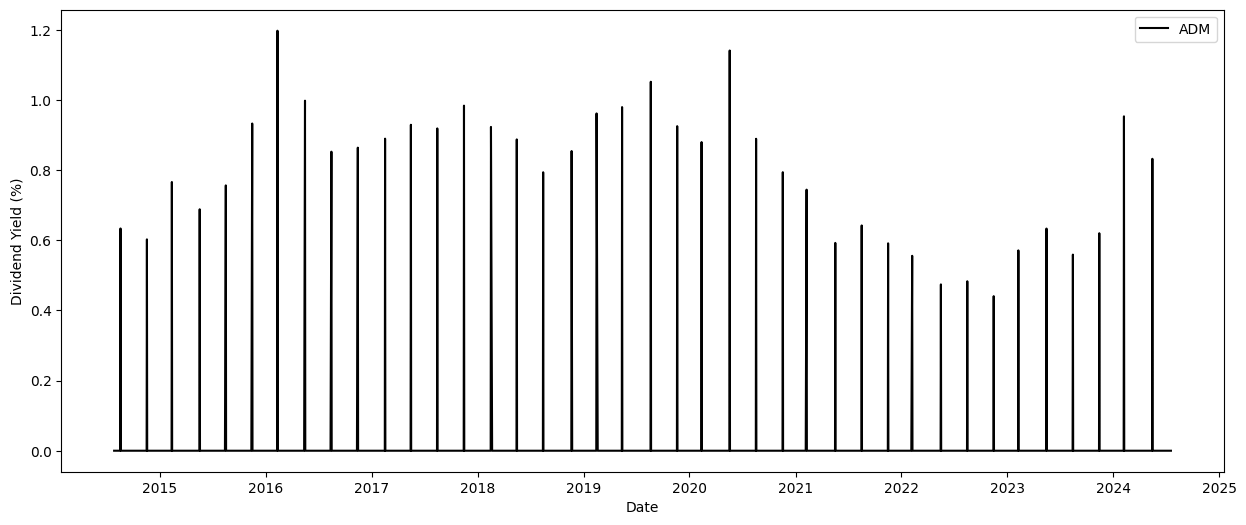

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


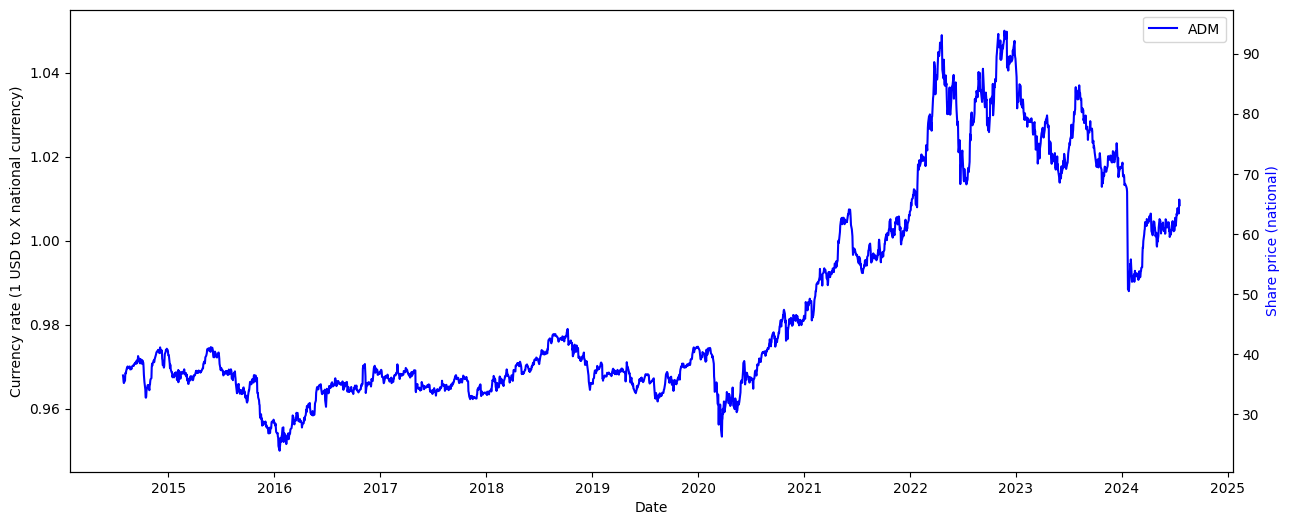

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

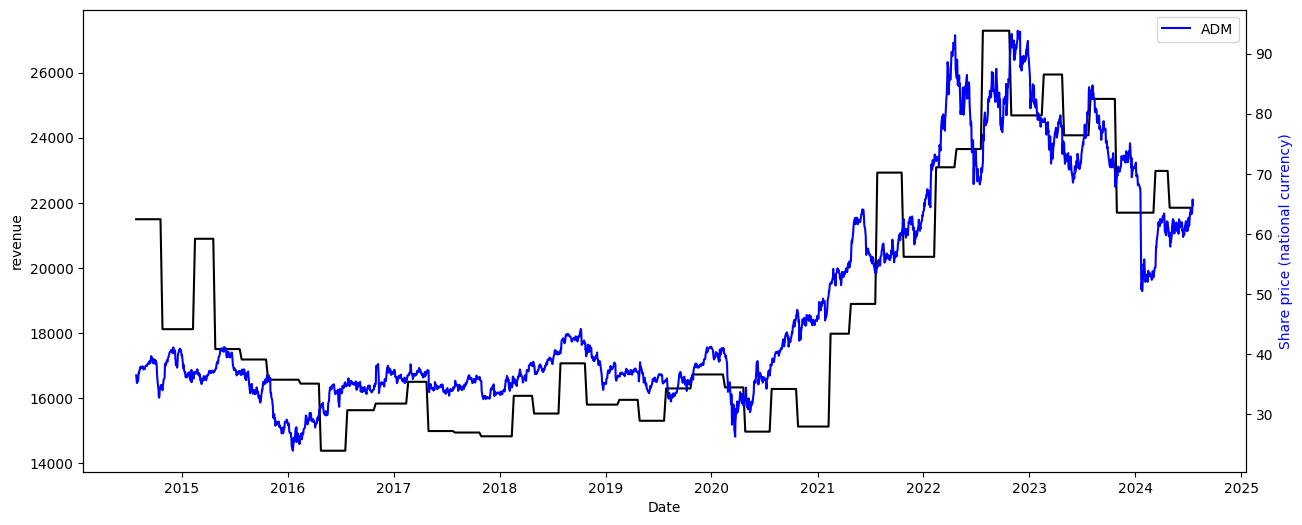

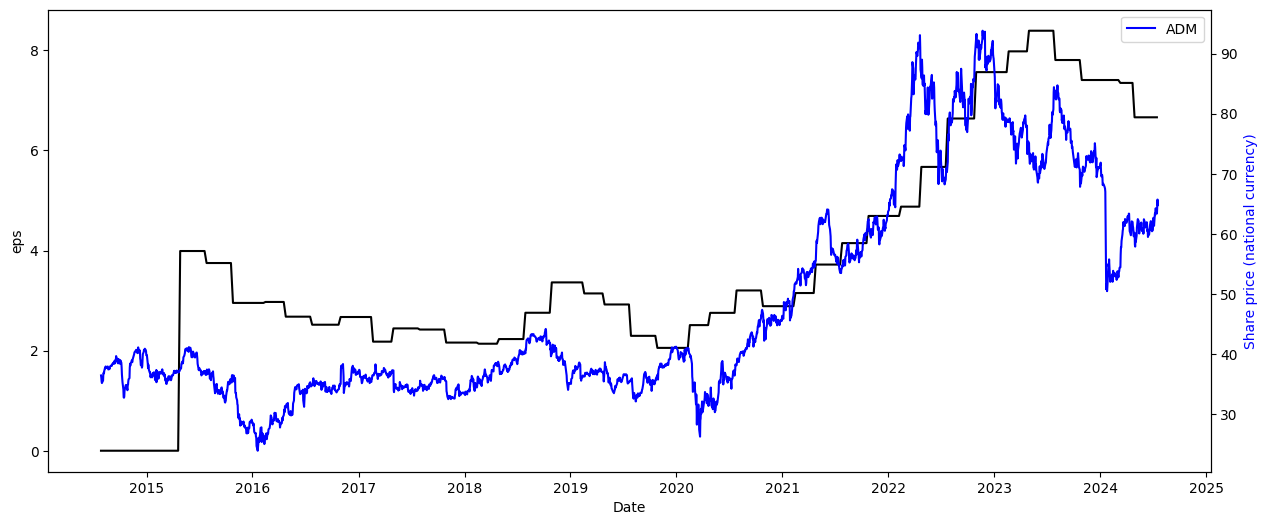

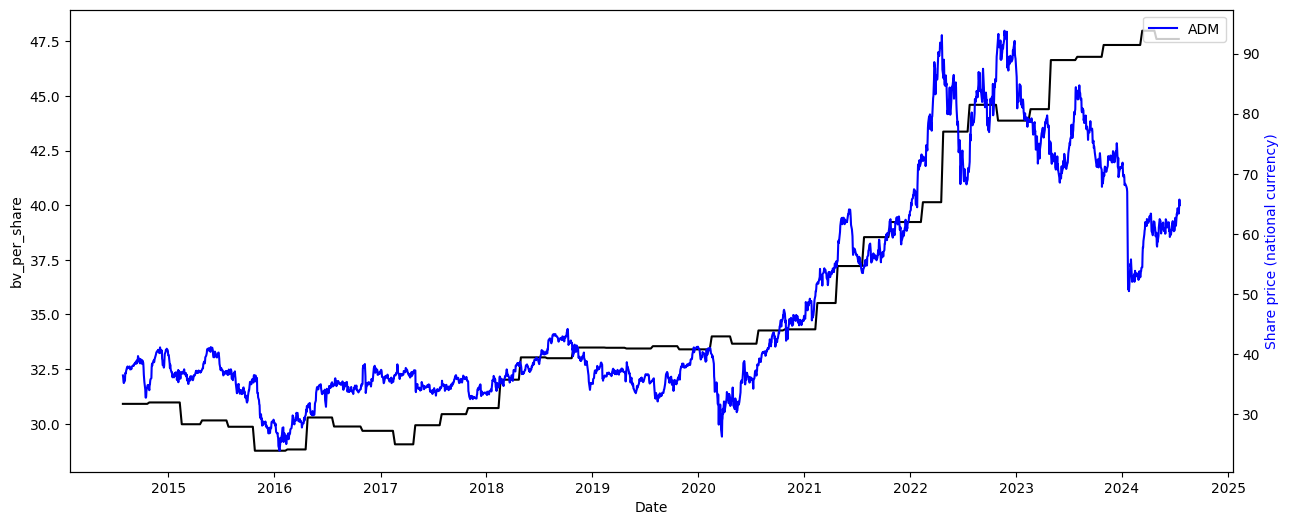

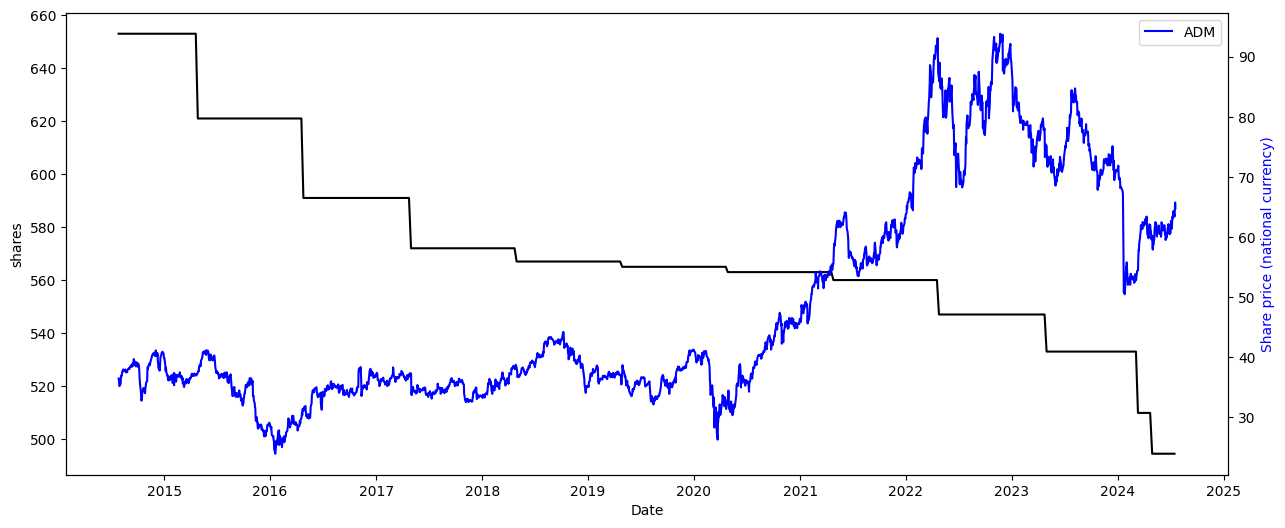

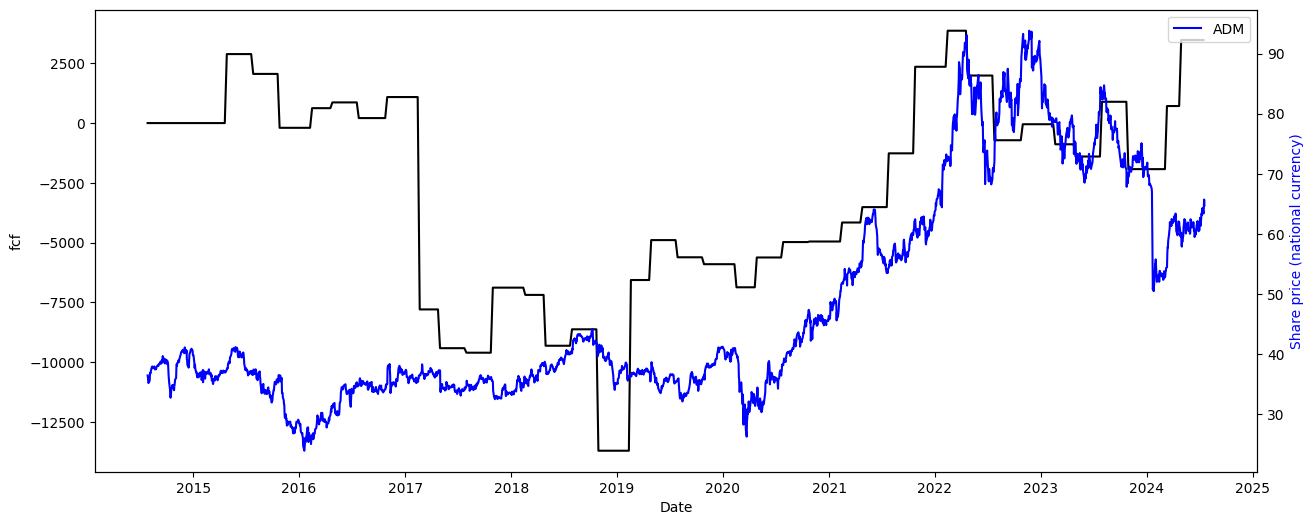

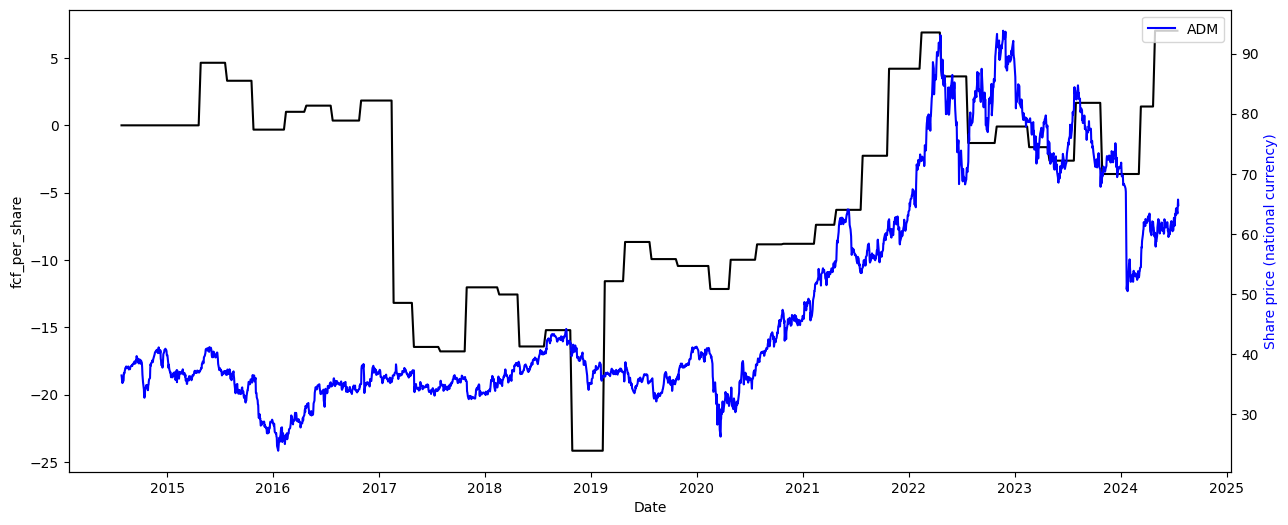

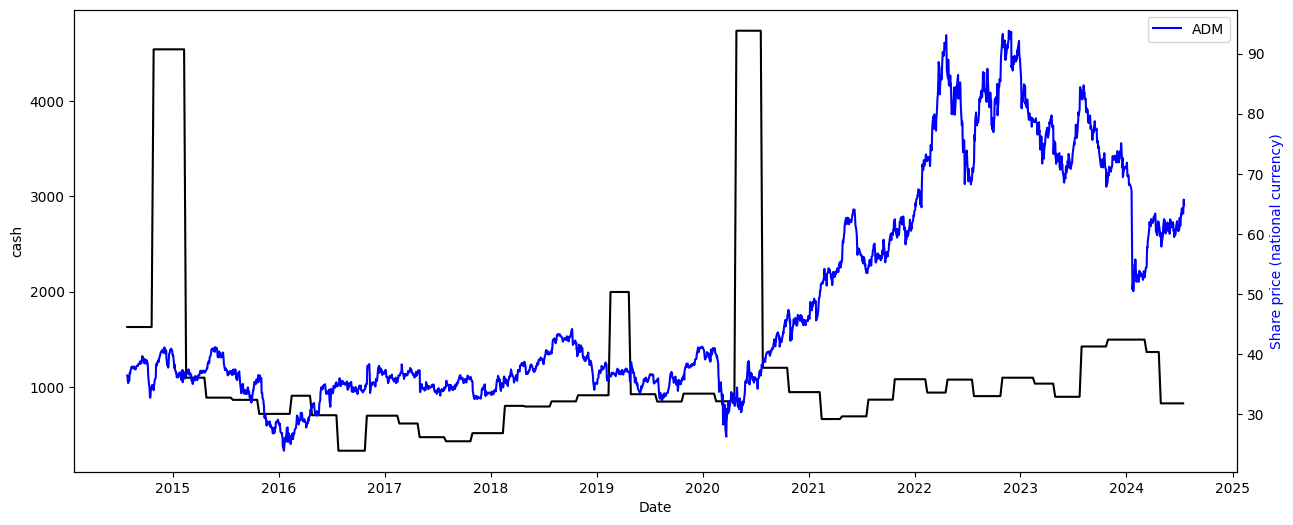

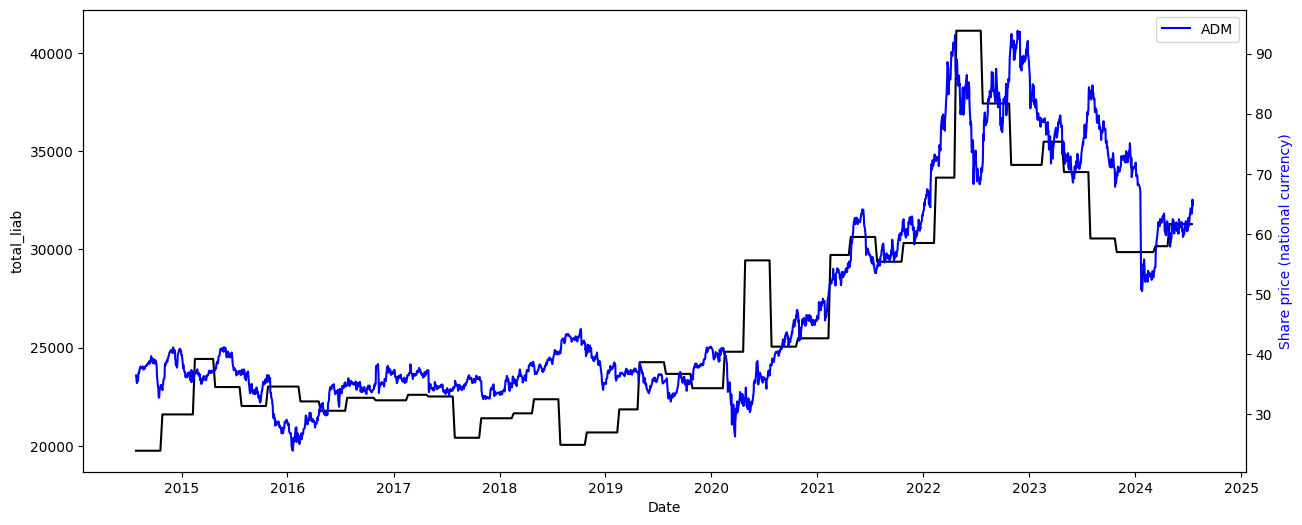

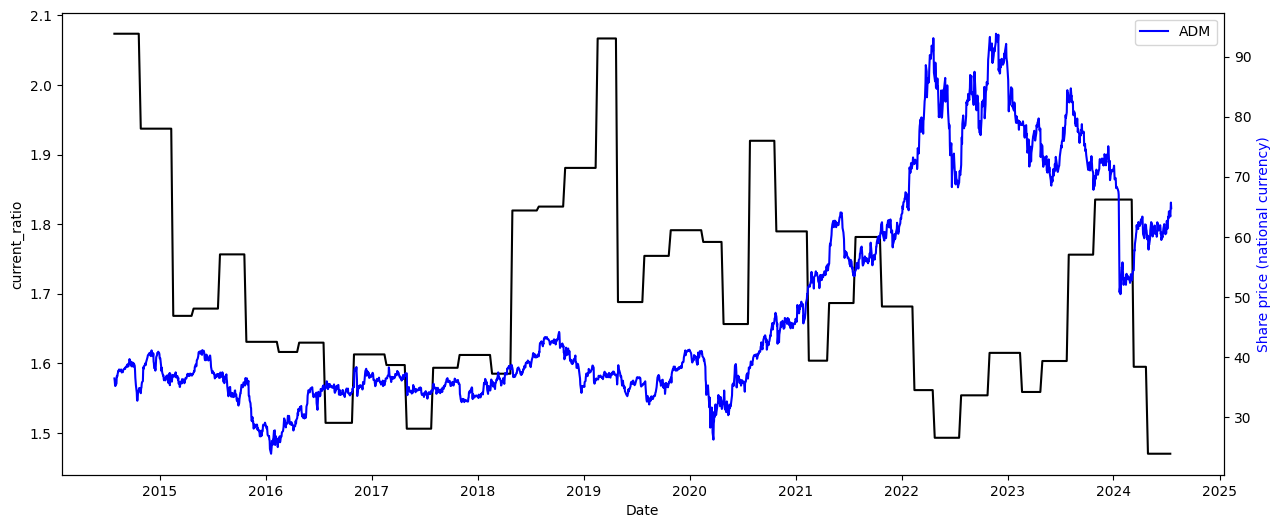

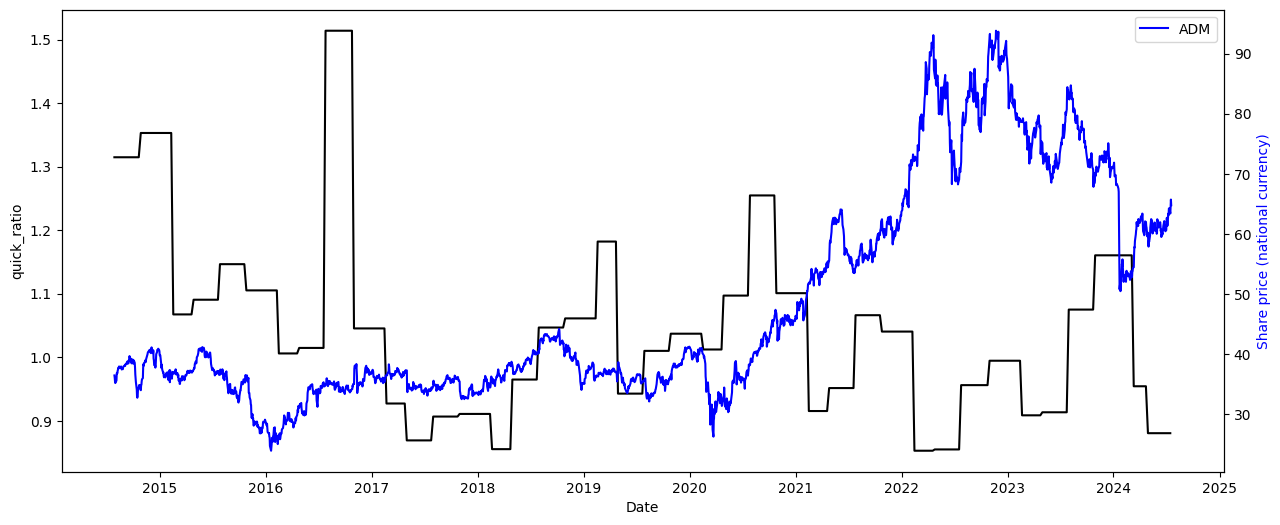

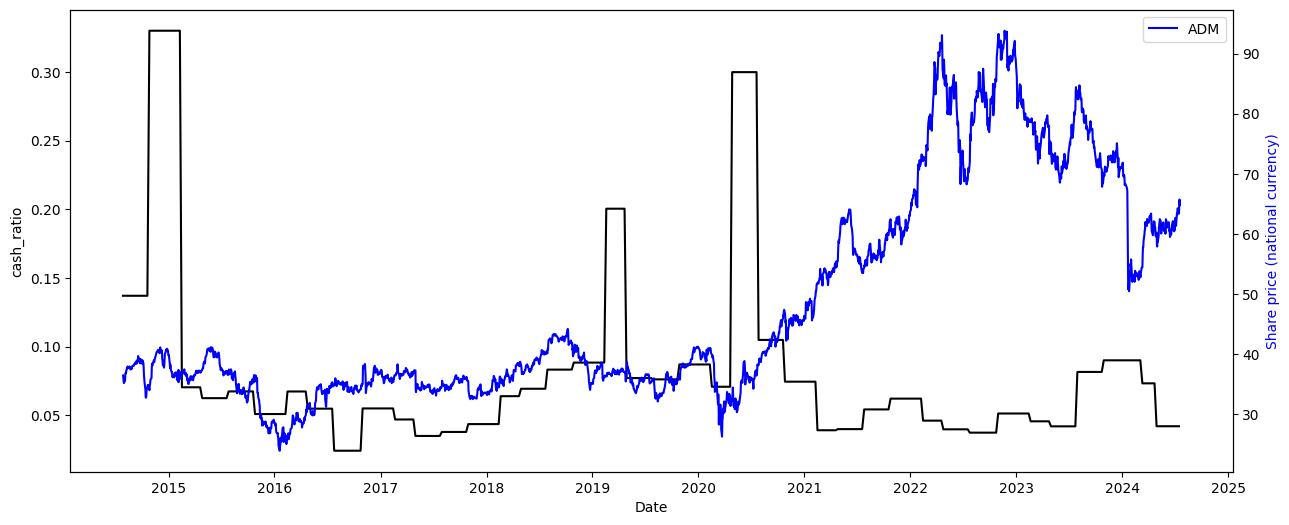

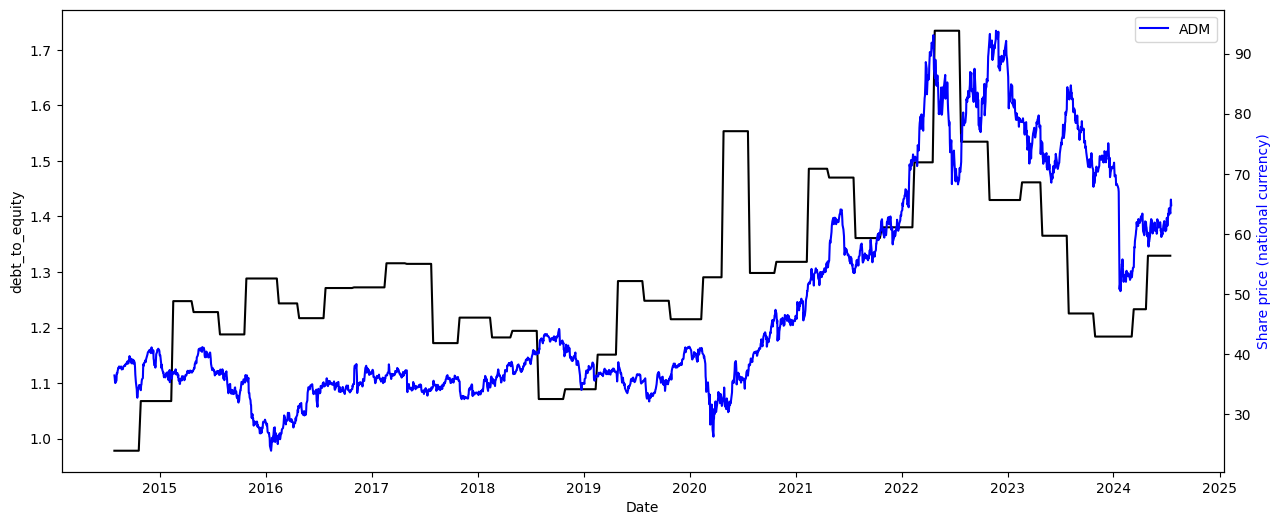

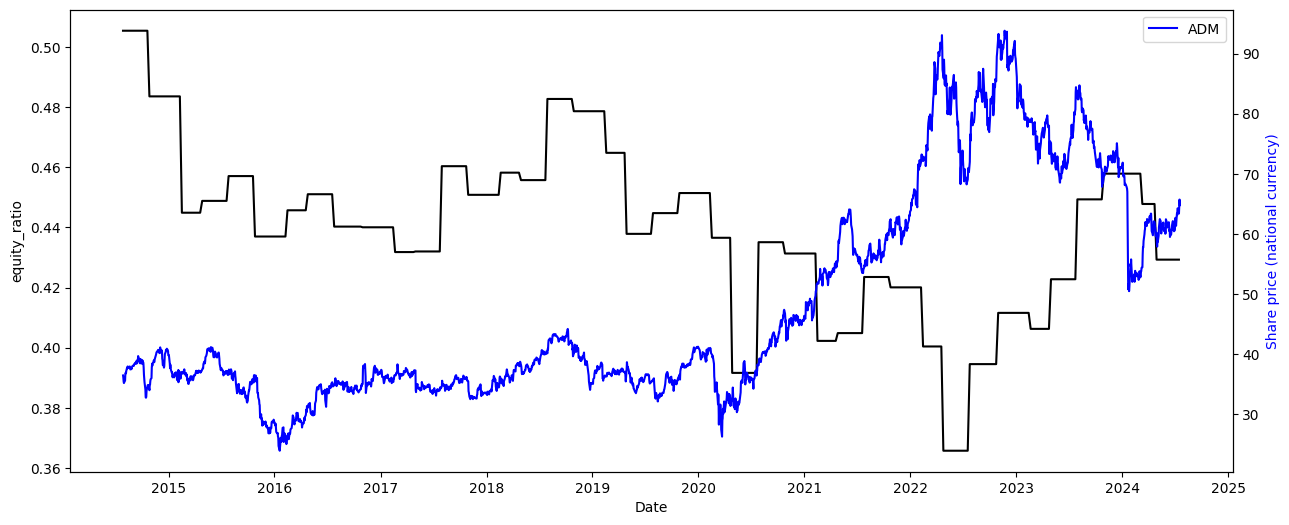

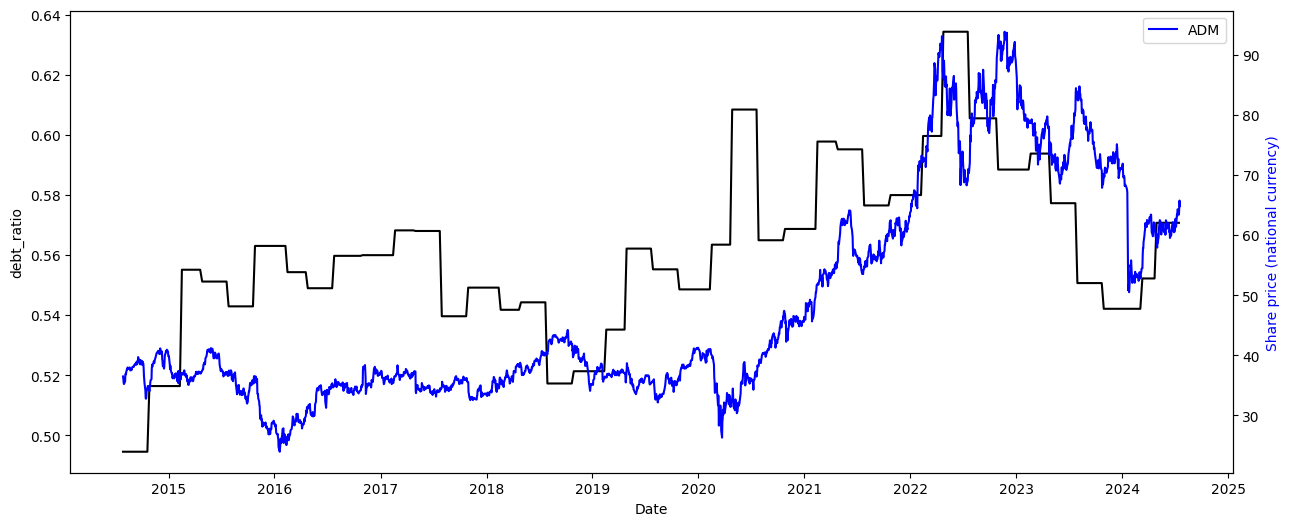

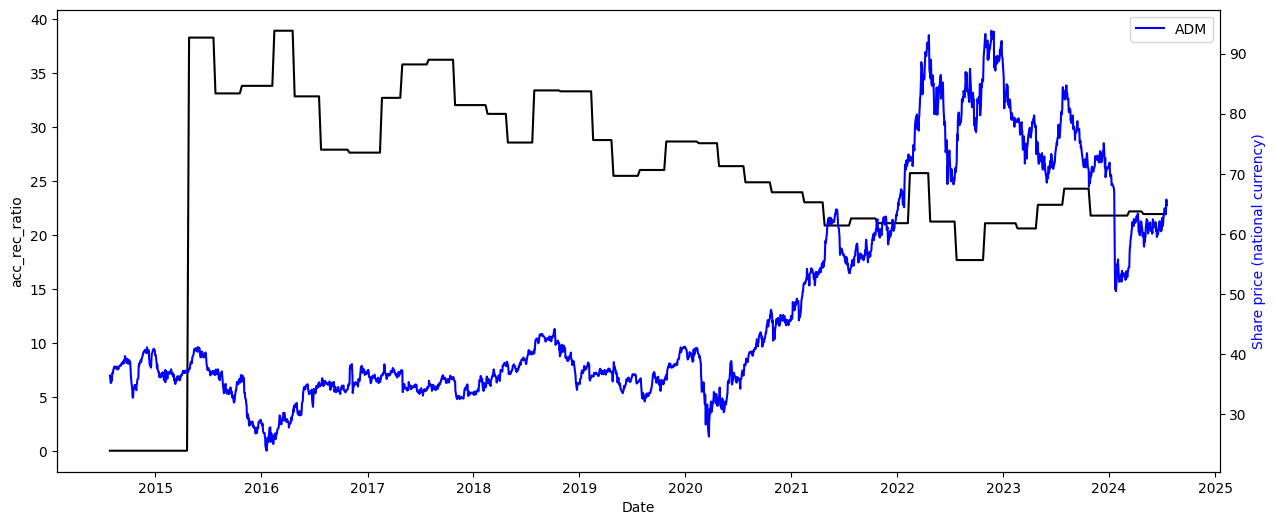

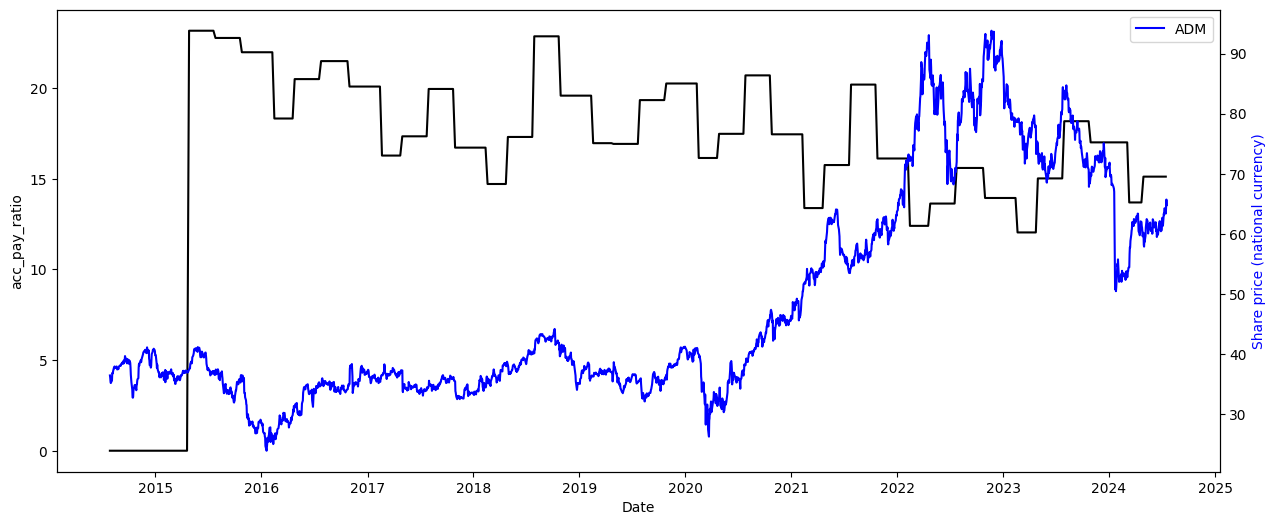

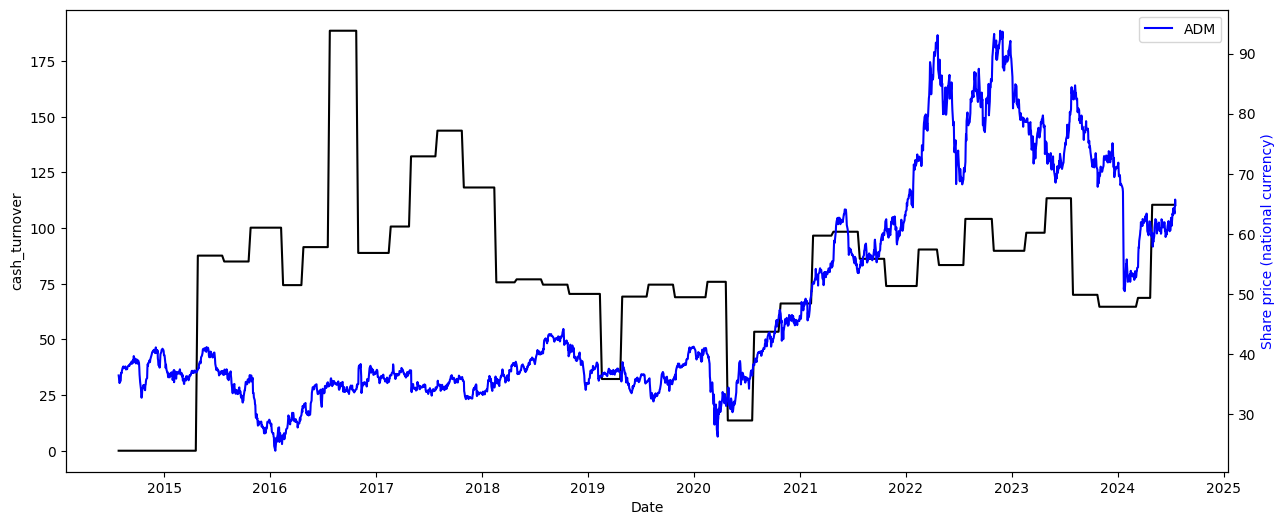

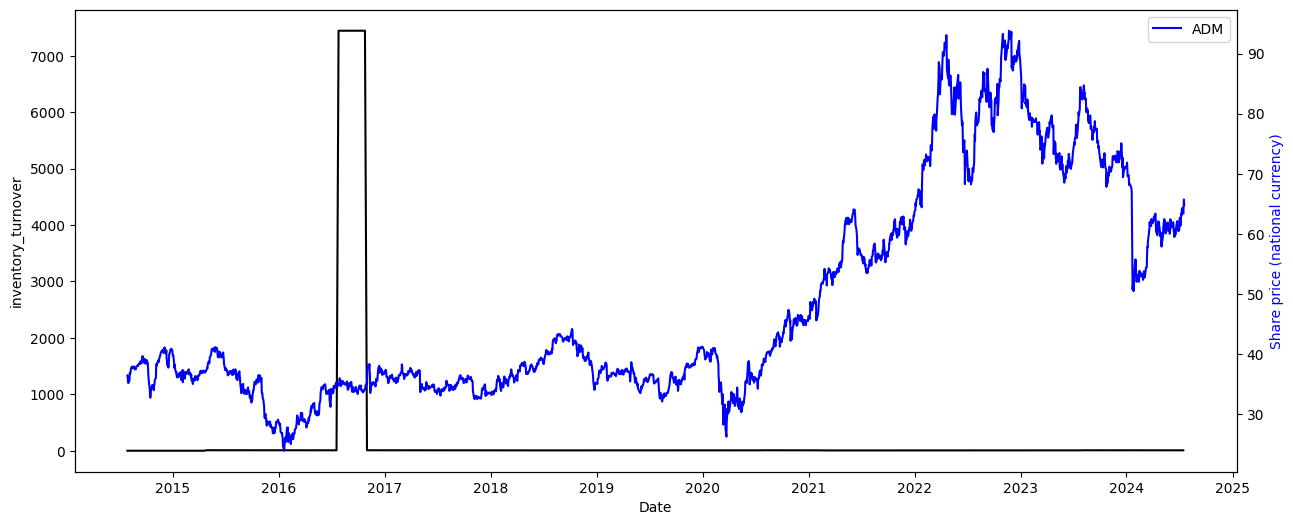

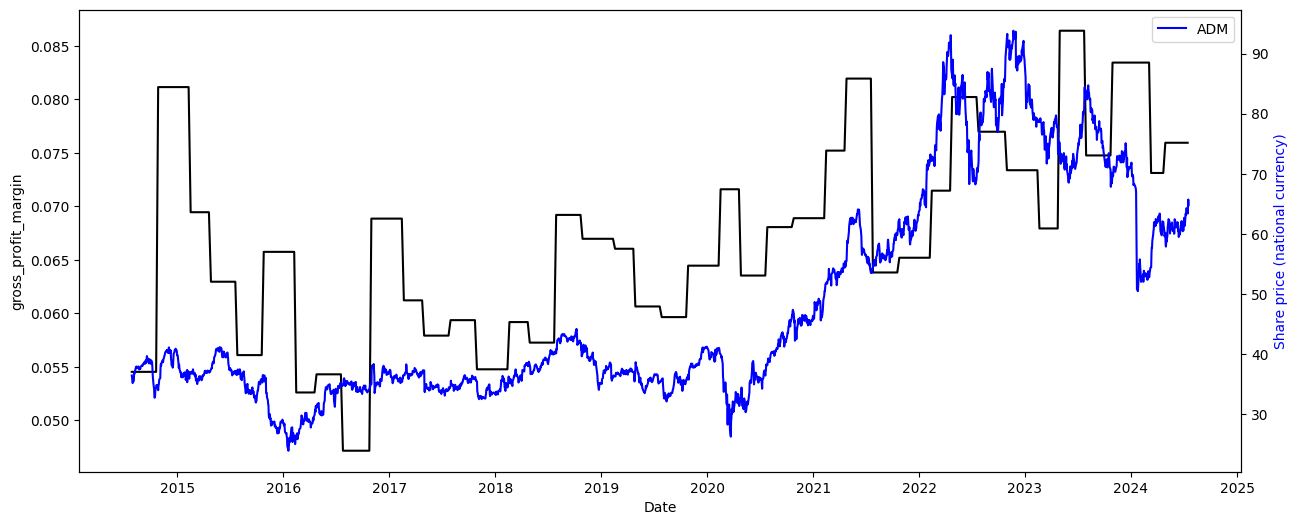

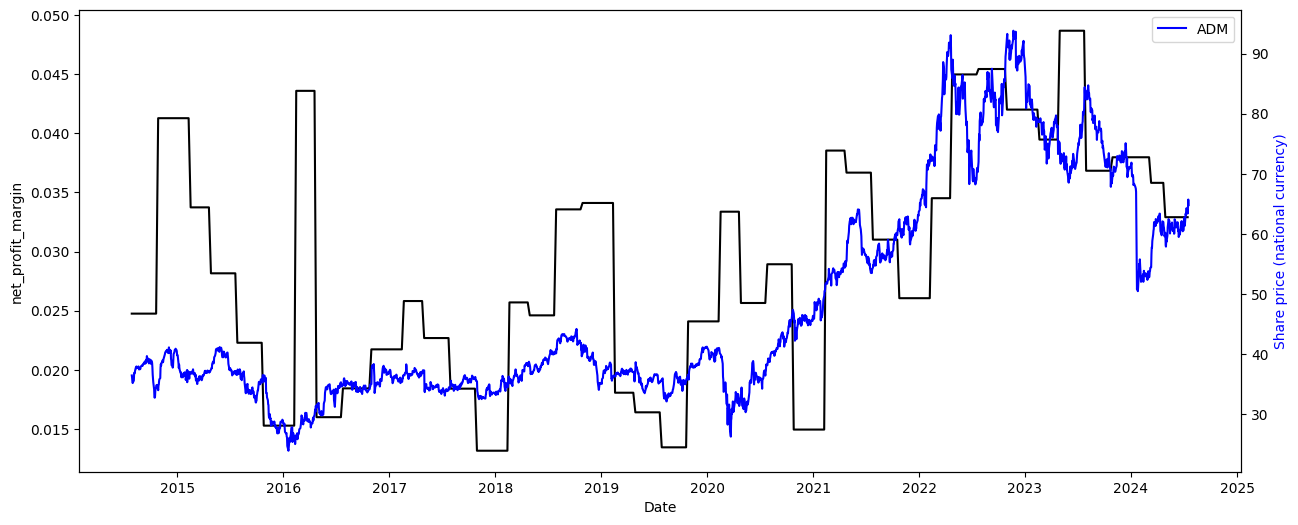

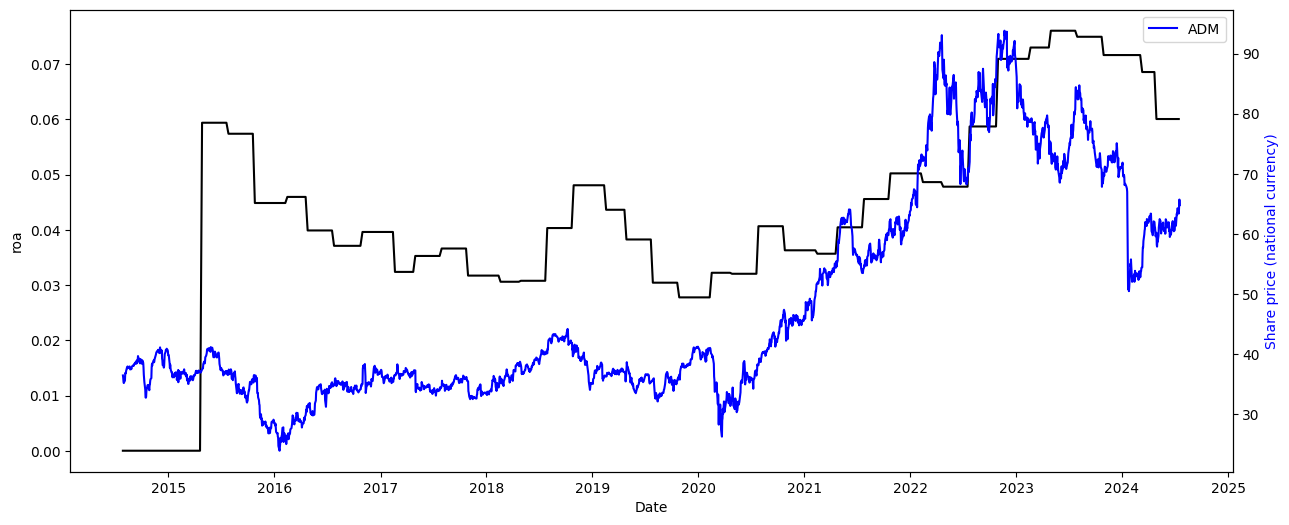

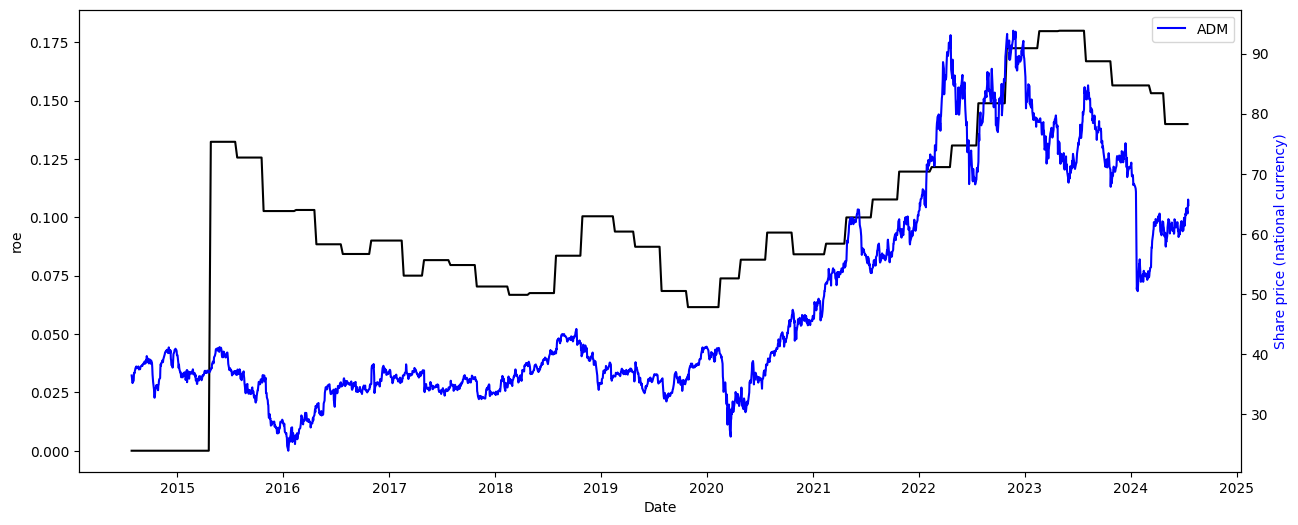

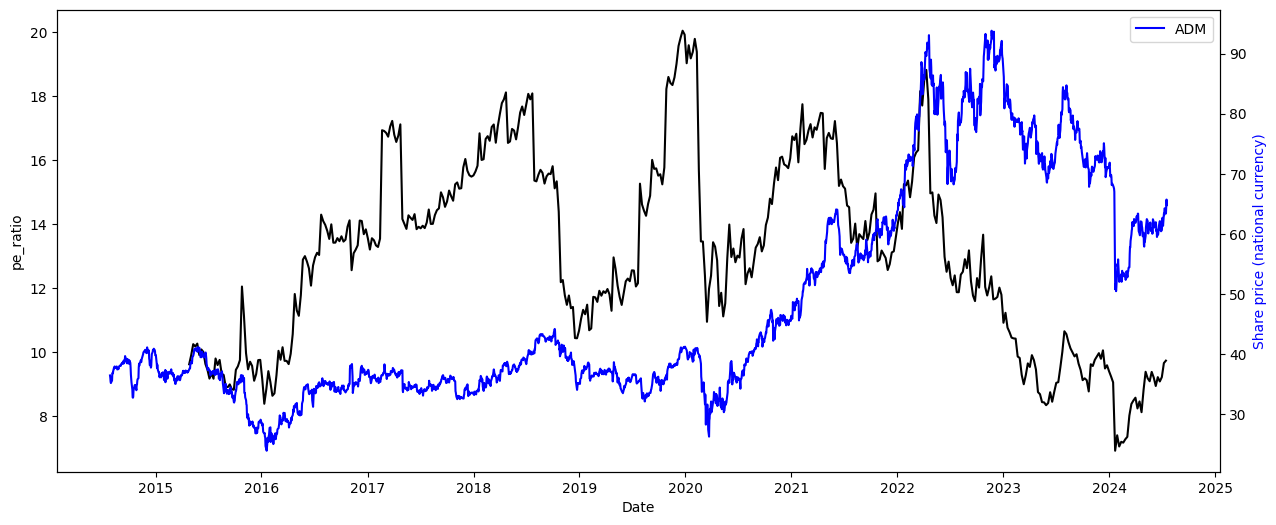

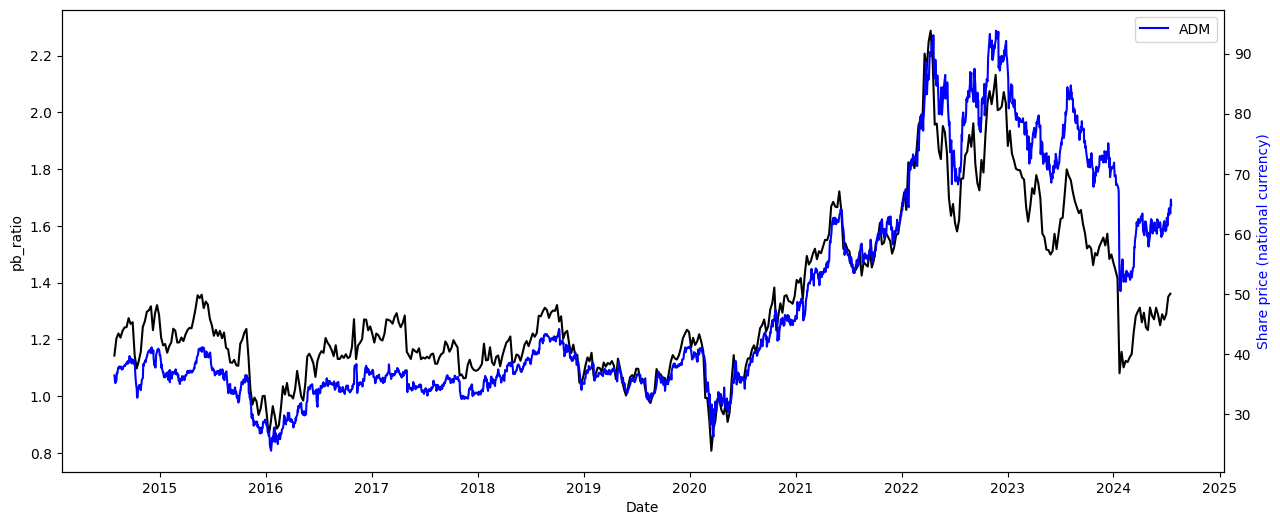

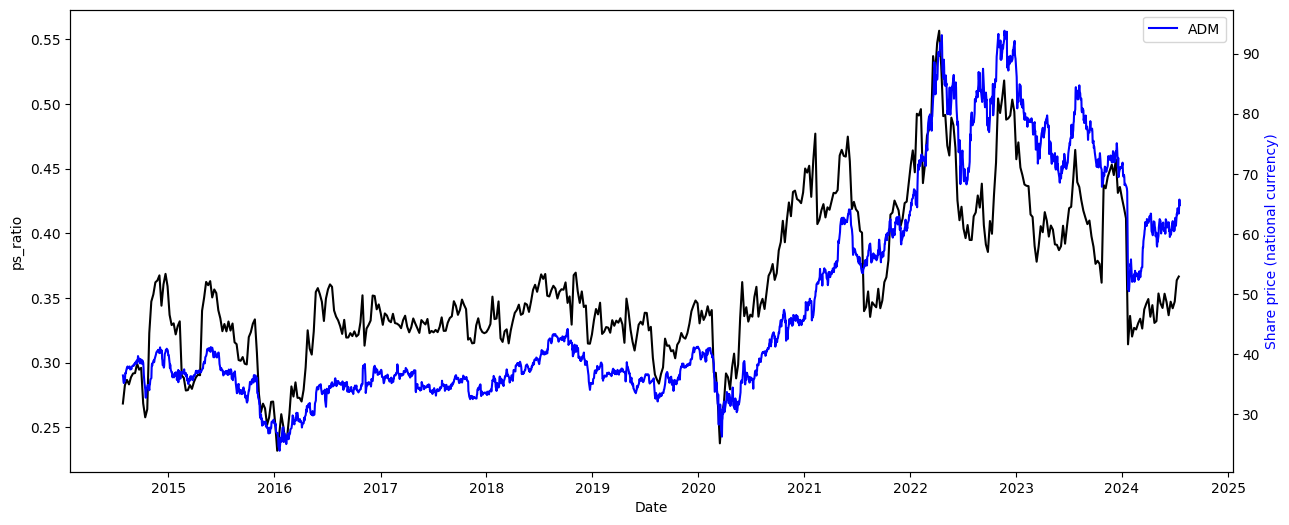

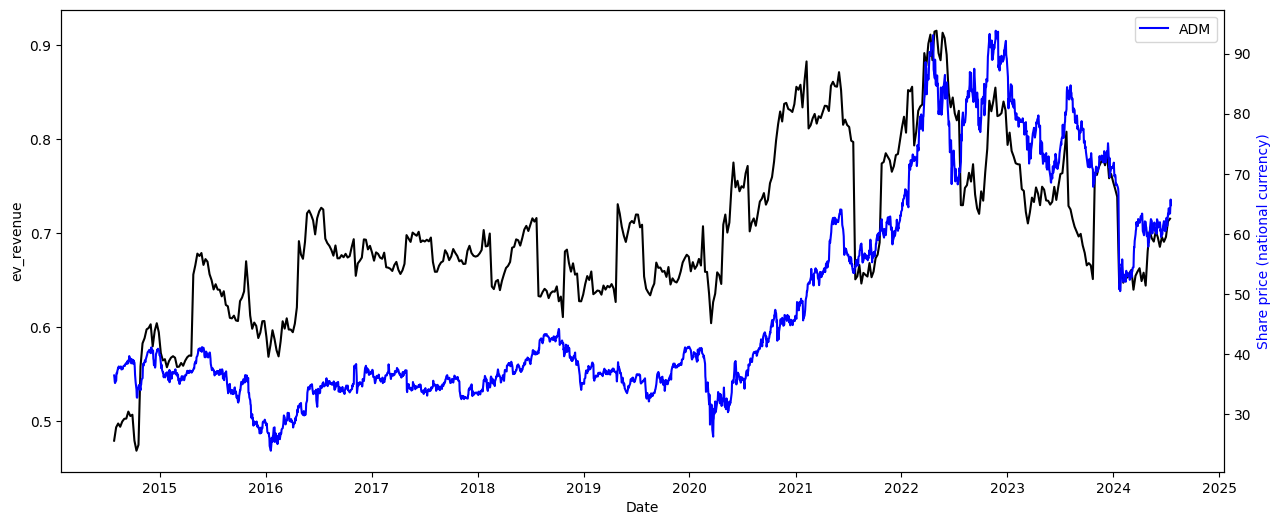

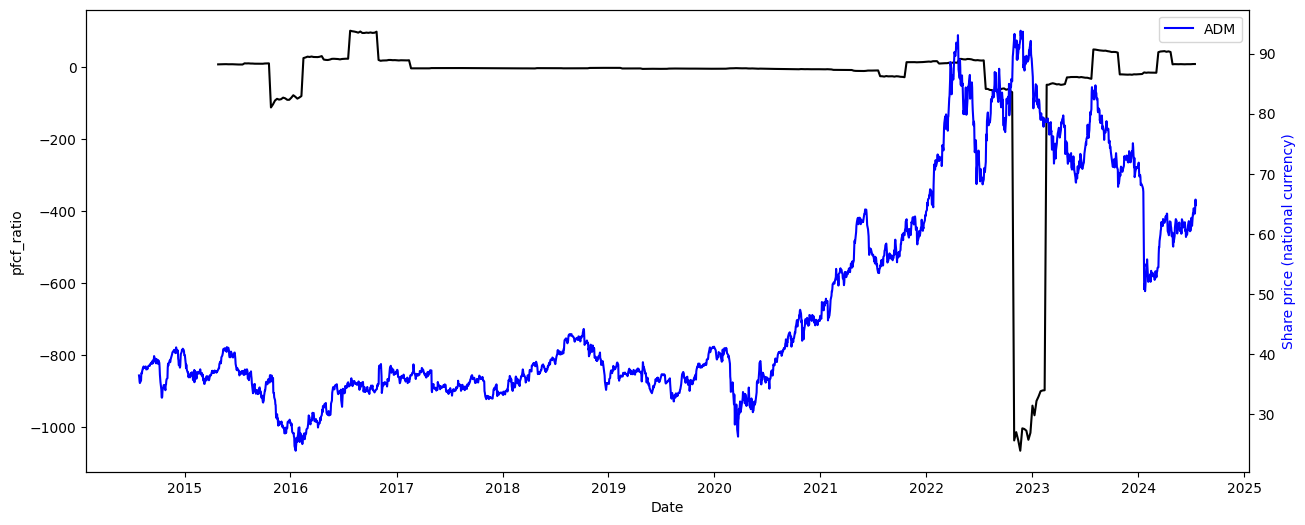

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

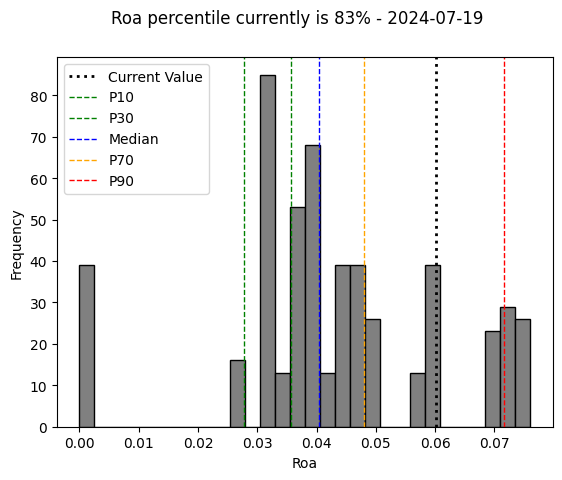

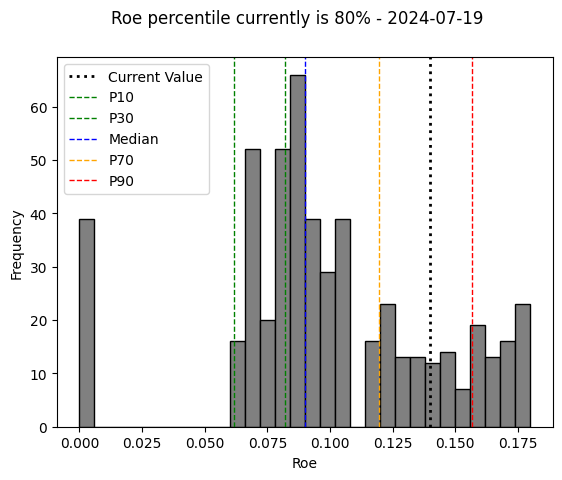

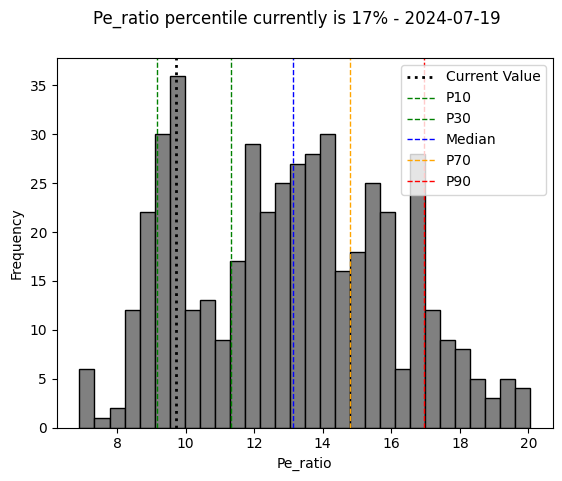

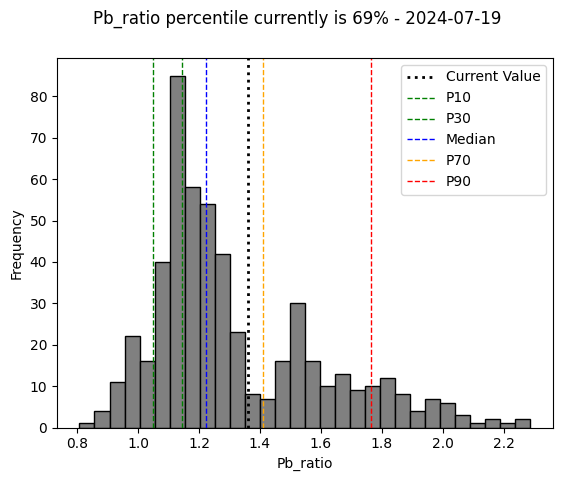

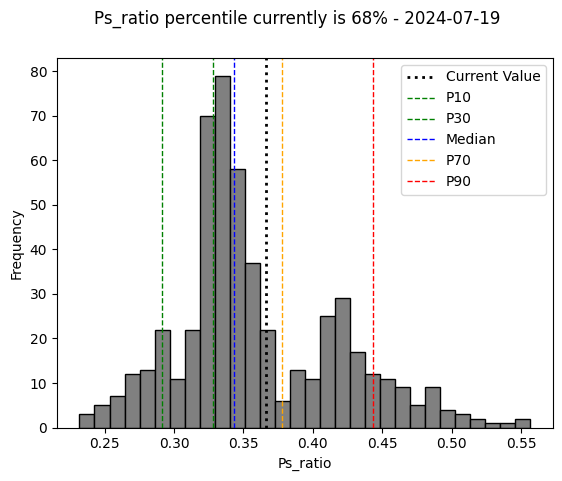

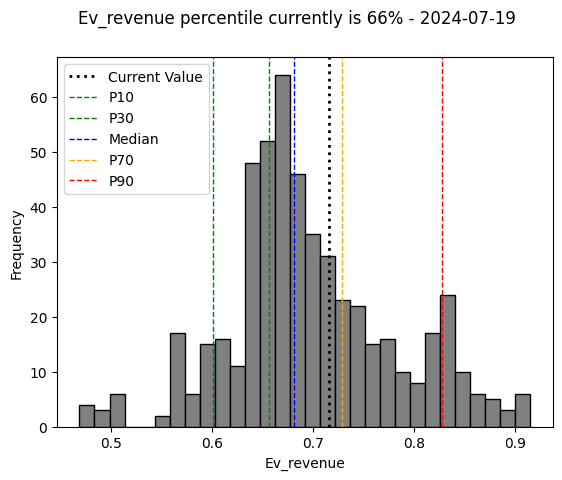

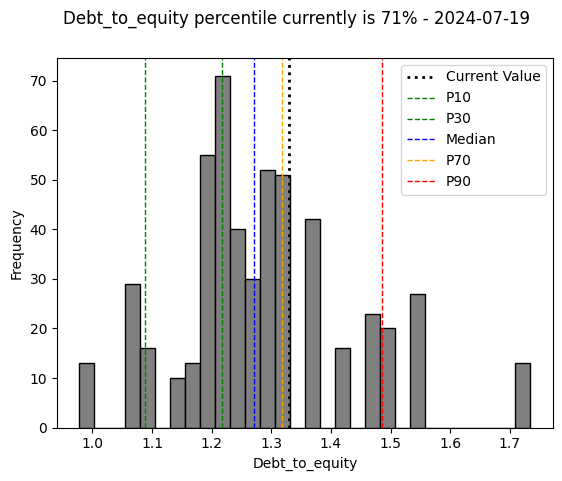

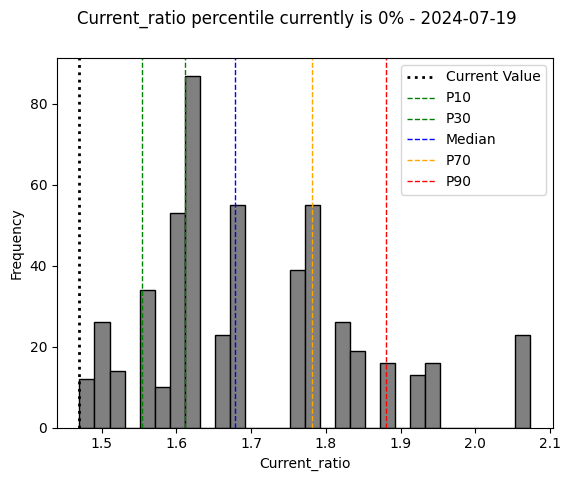

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.989125,-0.761624,0.476026,0.457453,0.441934,0.345031,-0.333295
roe,0.989125,1.000000,-0.709145,0.557489,0.520726,0.516780,0.466225,-0.395560
pe_ratio,-0.761624,-0.709145,1.000000,0.025649,0.158660,0.259896,0.057921,0.031679
pb_ratio,0.476026,0.557489,0.025649,1.000000,0.901710,0.689328,0.574404,-0.260103
ps_ratio,0.457453,0.520726,0.158660,0.901710,1.000000,0.875973,0.539230,-0.191484
ev_revenue,0.441934,0.516780,0.259896,0.689328,0.875973,1.000000,0.749712,-0.401532
debt_to_equity,0.345031,0.466225,0.057921,0.574404,0.539230,0.749712,1.000000,-0.624484
current_ratio,-0.333295,-0.395560,0.031679,-0.260103,-0.191484,-0.401532,-0.624484,1.000000


74 timestemos have been found!


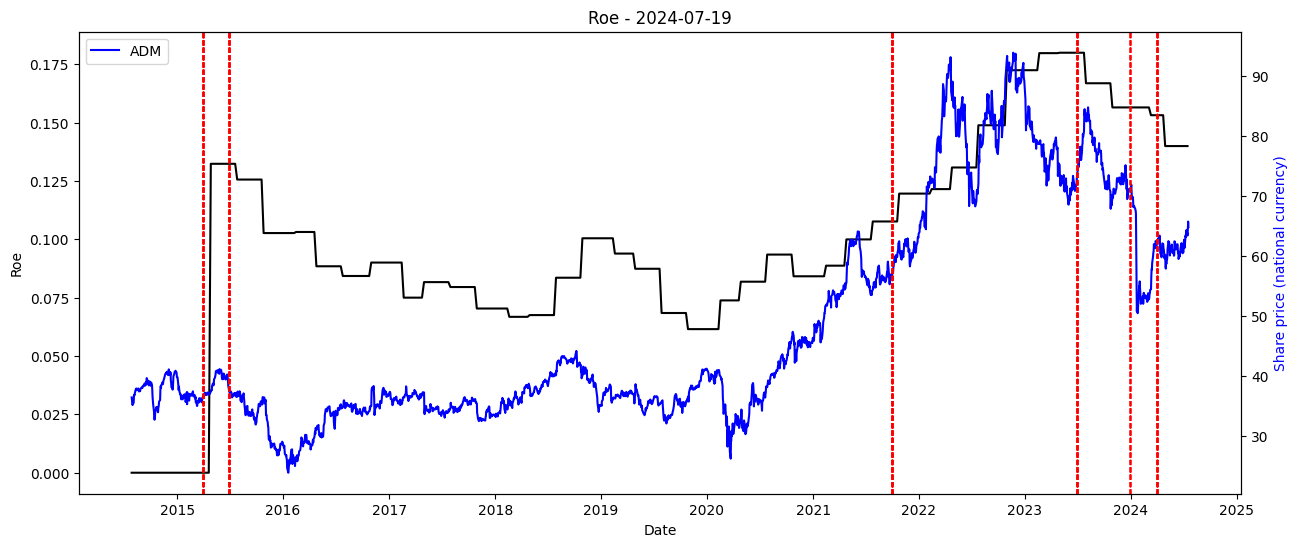

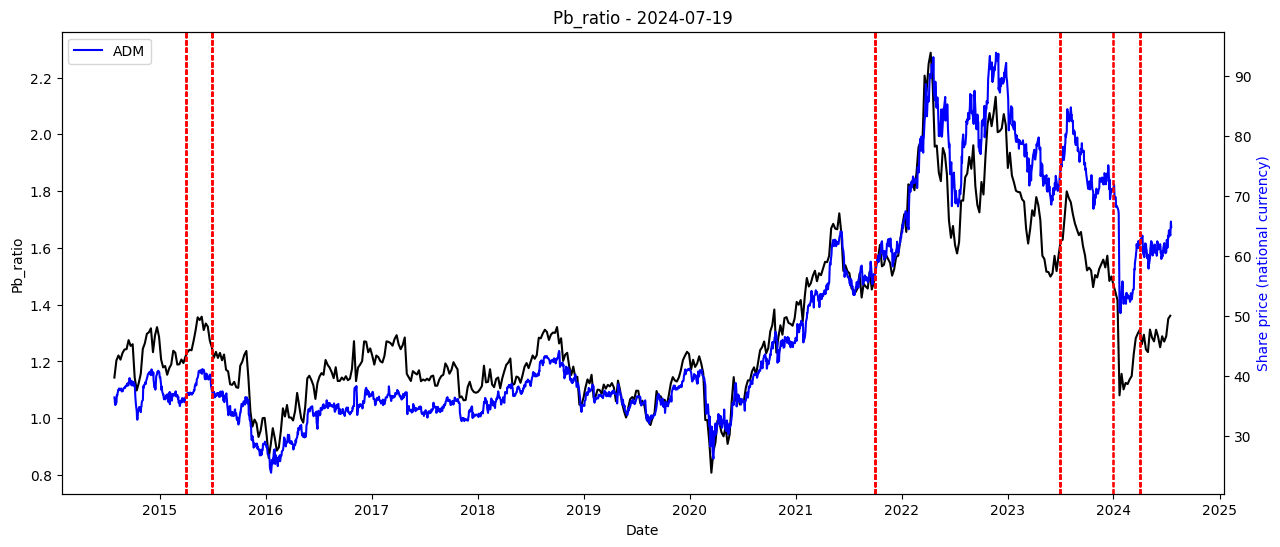

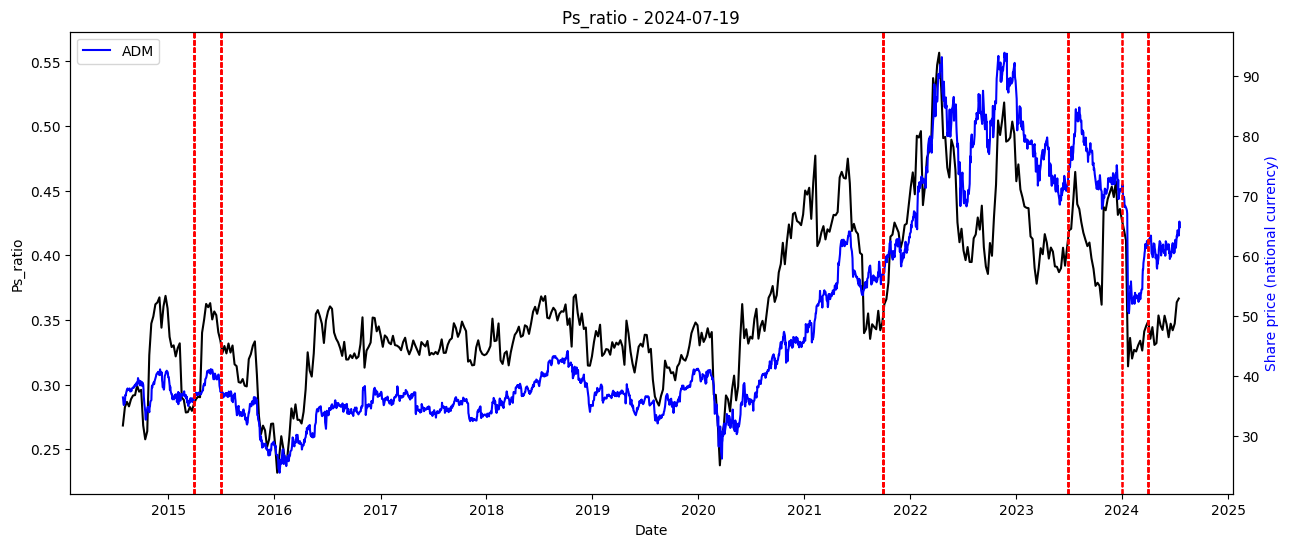

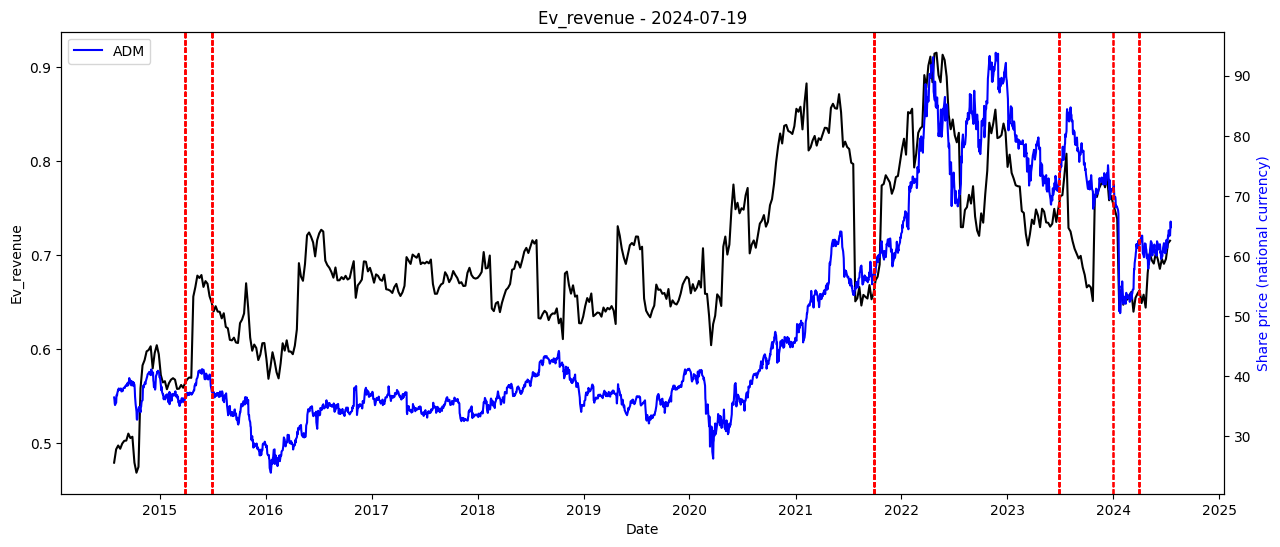

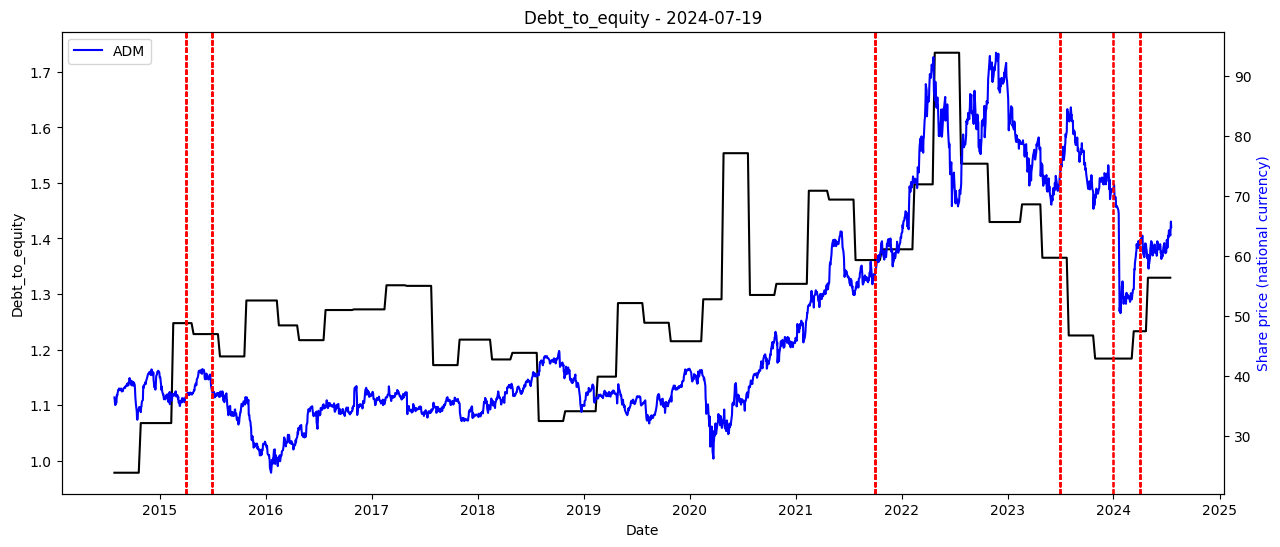

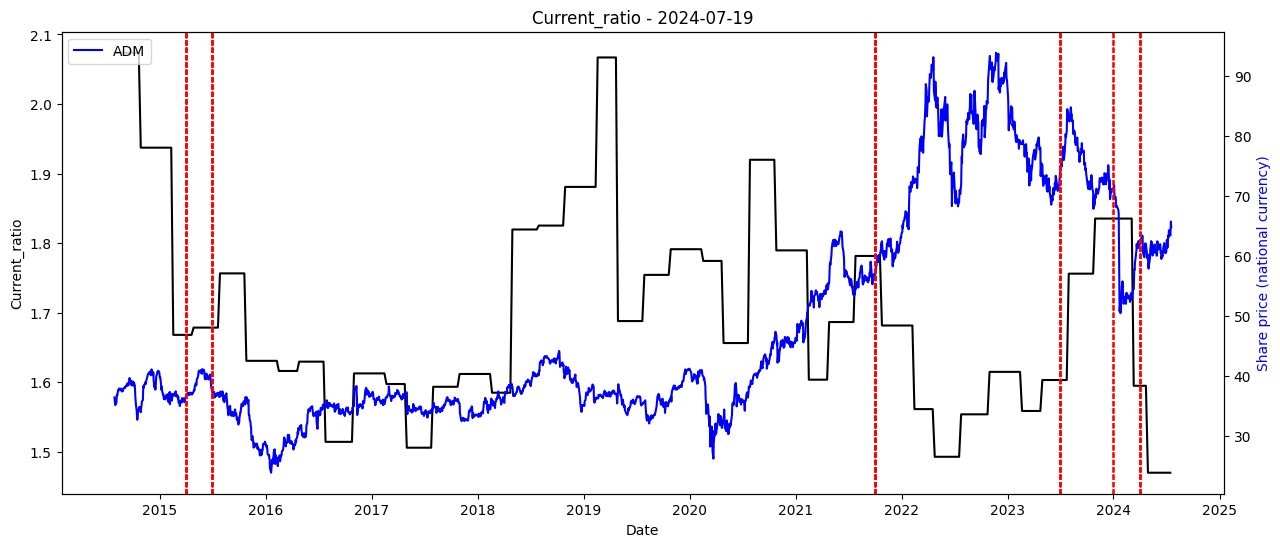

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )